# CMD

https://mybinder.org/v2/gh/s91233/cmd/HEAD

In [ ]:
import numpy as np

## Differenzcode

In [ ]:
folge = np.array([6, 8, -9, -1, -5, 8, -9, 1, -9, 2])
startwert = 1

diffcode = np.zeros_like(folge)
diffcode[0] = folge[0] - startwert
for i in range(1, len(folge)):
  diffcode[i] = folge[i] - folge[i-1]
print(diffcode)

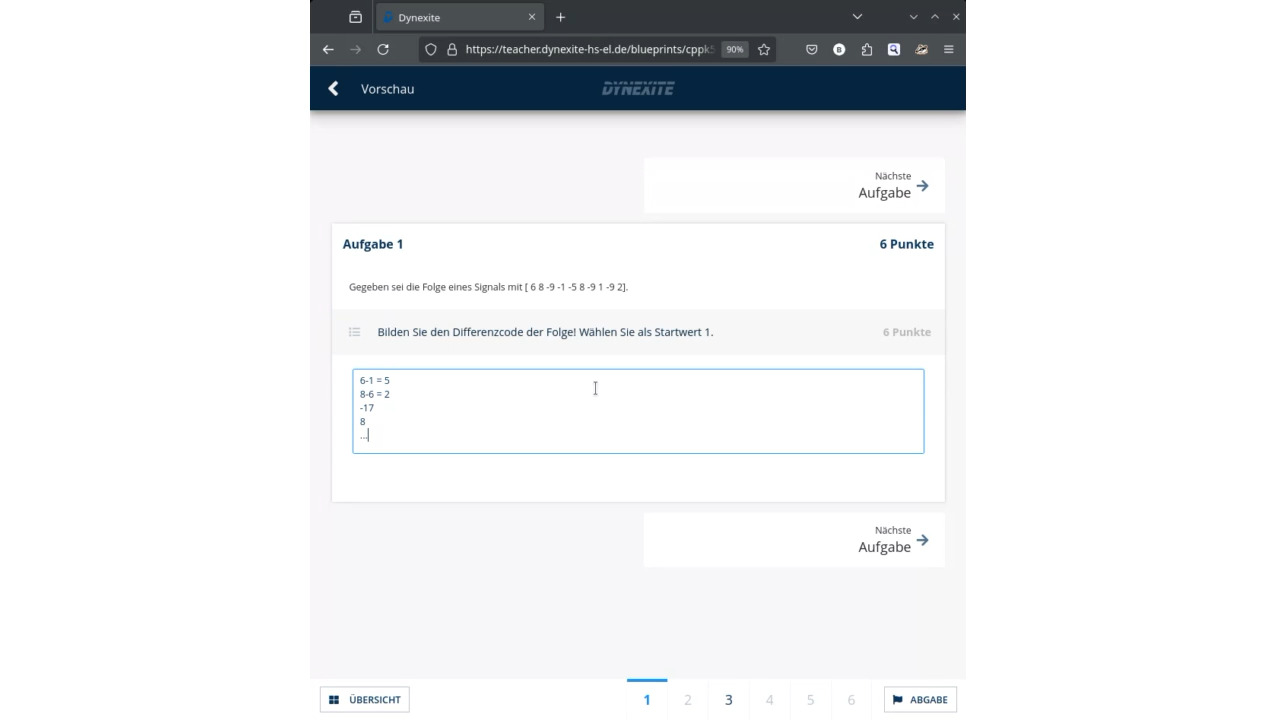

## DCT

In [ ]:
Y_C = np.array([[3,2],[6,3]])
DCT= np.array([[0.707,0.707],[0.707,-0.707]])
print(DCT @ Y_C @ DCT.T)

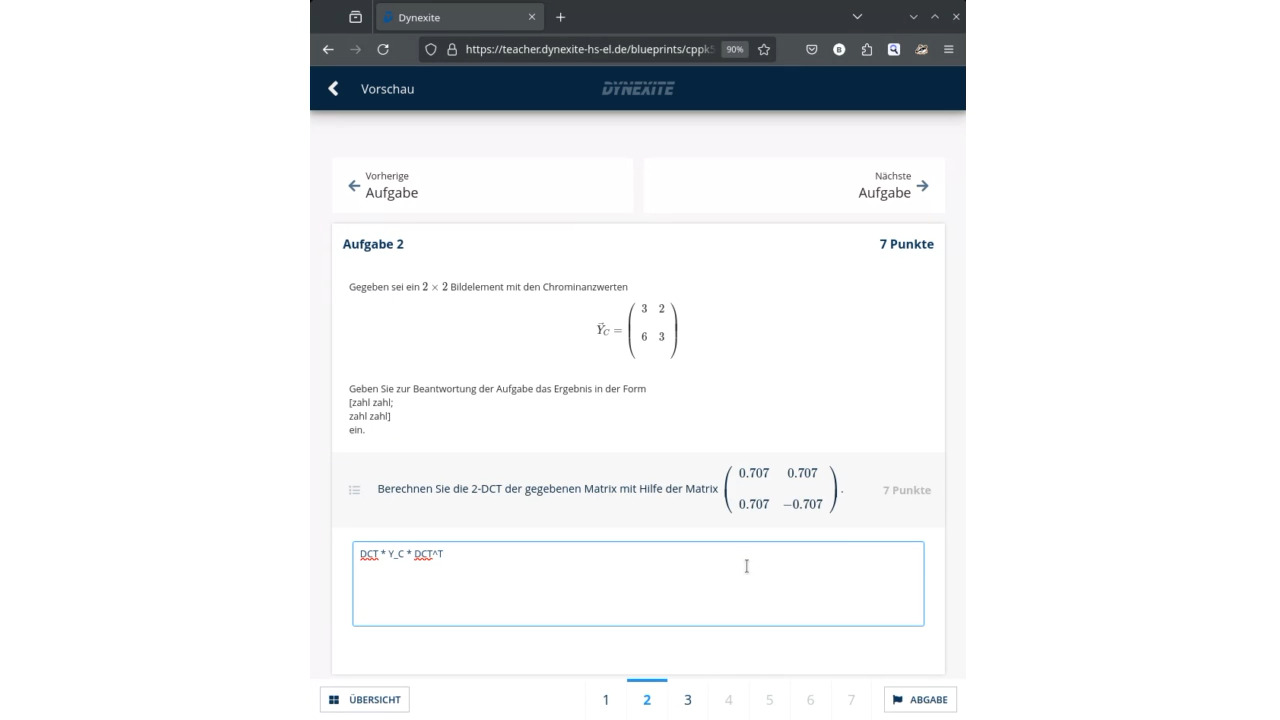

## Quadratischer Mittelwert

In [ ]:
folge = np.array([ -6, 9, -6, 3, -3, 1, -4, 3, 7, -10 ])

print(folge**2)
print(np.mean(folge**2))
print(np.sqrt(np.mean(folge**2)))

## Hamming

In [ ]:
# (7,4) Hamming Code
N = 7
K = 4
L = N-K

P = np.array([[0,1,0],[1,1,1],[0,1,1],[1,0,1]]) # Teilmatrix zur Prüfstellenberechnung
print("Teilmatrix P: \n", P.astype(int))

# Generatormatrix G zur Berechnung eines (7,4) Hamming Codes
G = np.hstack((np.identity(4), P))
print("Generatormatrix G: \n", G.astype(int))

# Nachricht u
u = np.array([1,1,0,1])
print("Nachricht u: \n", u.astype(int))

# Codewort v
v = u @ G % 2
print("Codewort v: \n", v.astype(int))

# Parität H
H = G[:, 3:].T
print("Parität H: \n", H.astype(int))

## Kanäle

Symmetrischer Binärkanal:

p = Bitfehlerwahrscheinlichkeit

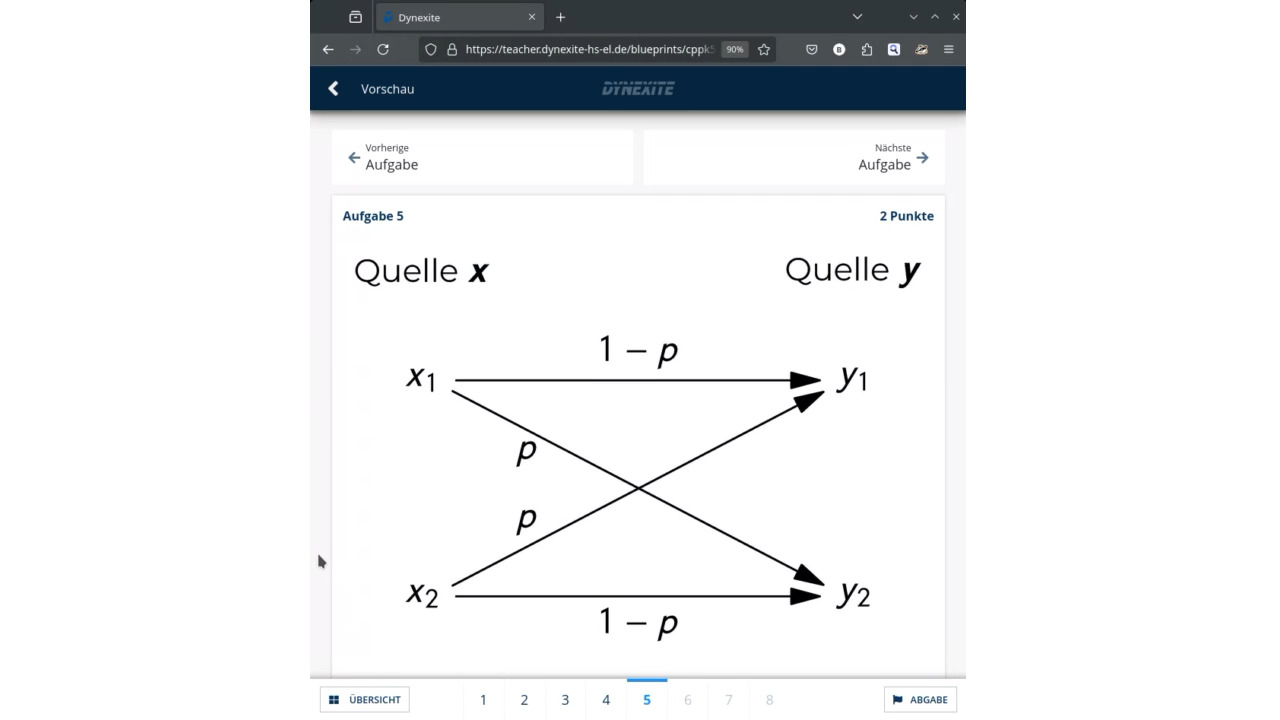

## Bitfehler

In [ ]:
re = 354/3600 # Fehler pro Stunde
rb = 3e9 # GBit/s
print("Fehlerwahrscheinlichkeit:", re/rb)

## Codewortlänge

In [ ]:
a_n = [110, 11100, 11101, 11111]

print("Mittlere Codewortlänge:", np.mean([len(str(x)) for x in a_n]))

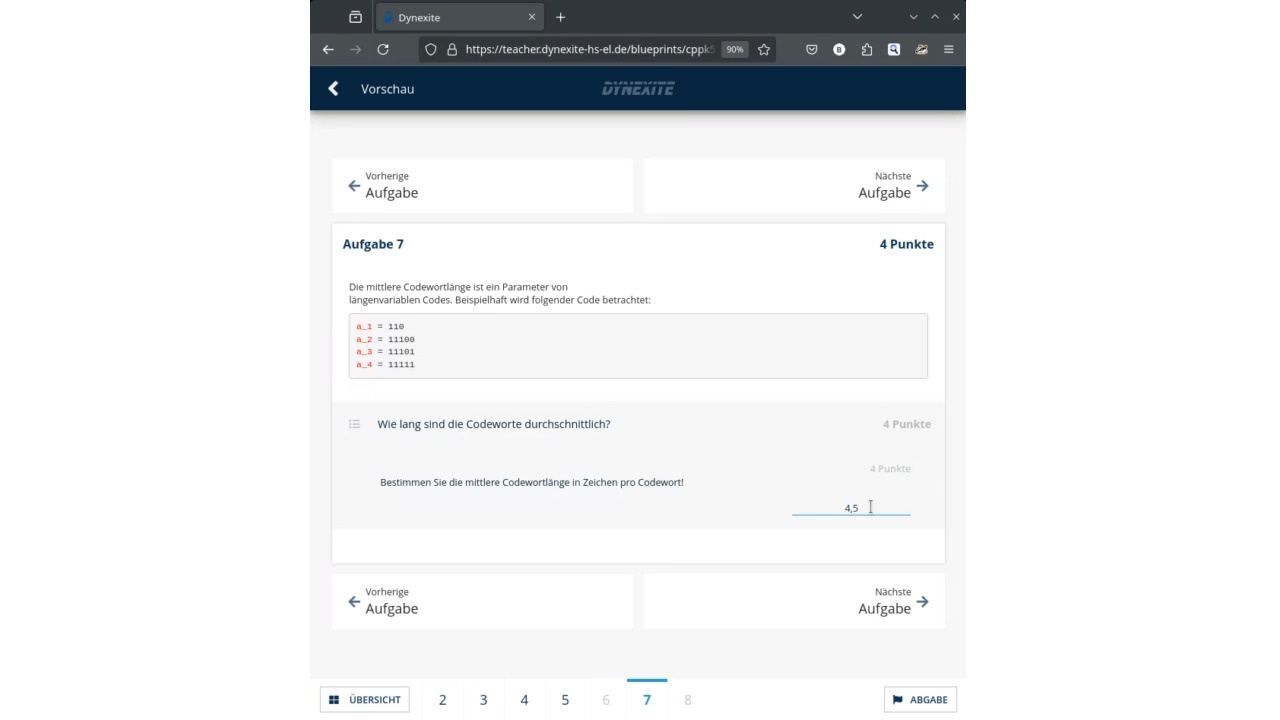

## Walsh

In [ ]:
f = 1 / np.sqrt(4) # Normierungsfaktor

walsh = np.array([
    [1, 1, 1, 1],
    [1, 1, -1, -1],
    [1, -1, -1, 1],
    [1, -1, 1, -1]
]) * f
print("Walsch-Matrix: \n", walsh) # orthogonal

basis = np.array([
    [1, -1, 1, -1],
    [-1, 1, -1, 1],
    [1, -1, 1, -1],
    [-1, 1, -1, 1]
]) * f
print("Basisbild: \n", basis)

image = np.array([
    [100, 100, 100, 100],
    [100,  10,  10, 100],
    [100,  10,  10, 100],
    [100, 100, 100, 100]
])
print("Bildblock: \n", image.astype(int))

print("Koeffizient Y33: ", np.sum(image @ basis))

print(image @ basis)


In [ ]:
# prompt: Zur Codierung steht der Bildblock X=image, berechne den Koeffizienten Y33.




## ZigZag

In [ ]:
# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]

    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):

        if ((h + v) % 2) == 0:                 # going up

            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h]
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h]
            	v = v - 1
            	h = h + 1
            	i = i + 1


        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h]
        		h = h + 1
        		i = i + 1

        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h]

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h]
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)
        	output[i] = input[v, h]
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output




# Inverse zigzag scan of a matrix
# Arguments are: a 1-by-m*n array,
# where m & n are vertical & horizontal sizes of an output matrix.
# Function returns a two-dimensional matrix of defined sizes,
# consisting of input array items gathered by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com


def inverse_zigzag(input, vmax, hmax):

	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)):
		#print ('v:',v,', h:',h,', i:',i)
		if ((h + v) % 2) == 0:                 # going up

			if (v == vmin):
				#print(1)

				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i]
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i]
				v = v - 1
				h = h + 1
				i = i + 1


		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i]
				h = h + 1
				i = i + 1

			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i]
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1

			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i]
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)
			output[v, h] = input[i]
			break


	return output

In [ ]:
zigzag(np.array([[1,2,3],[4,5,6],[7,8,9]]))

## Binärkompliment

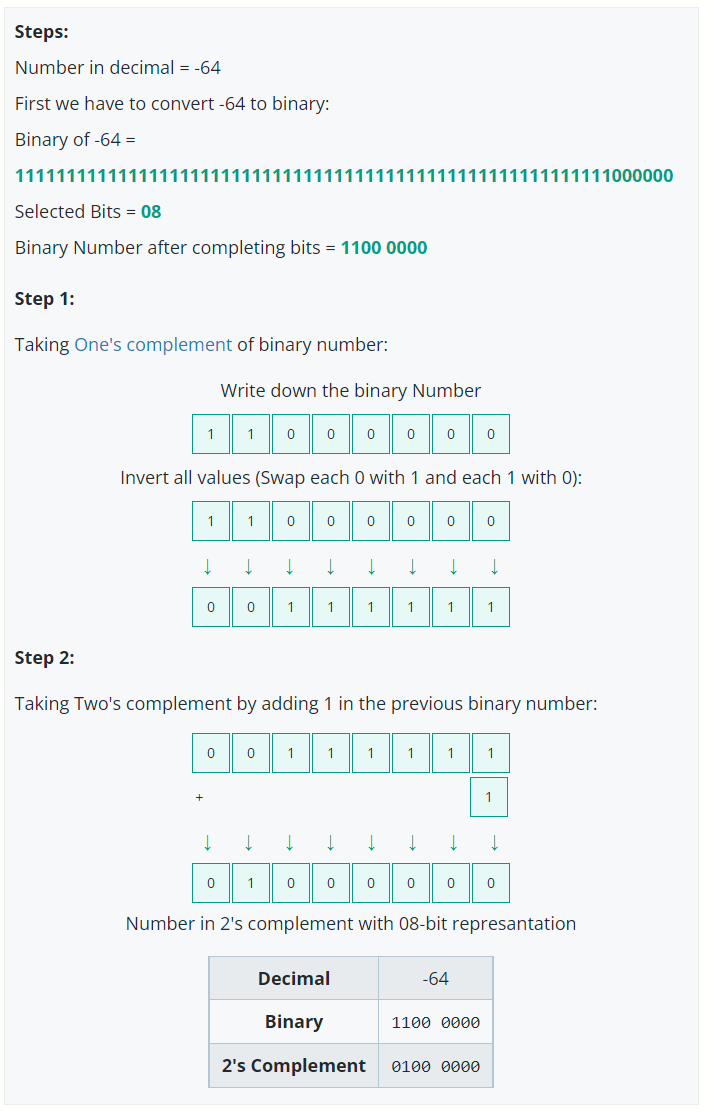

https://www.allmath.com/de/zweierkomplement.php